# H-DHT22 and T-DHT22 measures 

by: Widya Meiriska

### 1. Read Dataset

In [4]:
import csv
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

#### T-DHT22 measures

In [5]:
df = pd.read_csv('../data/raw/measures/T-DHT22-measures.csv')

In [6]:
df.tail()

,sensor,value,time
1440145,T-DHT22,27.4,2018-03-13T11:41:54Z
1440146,T-DHT22,27.4,2018-03-13T11:41:58Z
1440147,T-DHT22,27.5,2018-03-13T11:42:02Z
1440148,T-DHT22,27.4,2018-03-13T11:42:06Z
1440149,T-DHT22,27.4,2018-03-13T11:42:10Z


#### H-DHT22 measures

In [7]:
df1 = pd.read_csv('../data/raw/measures/H-DHT22-measures.csv')

In [8]:
df1.tail()

,sensor,value,time
1440155,H-DHT22,1.0,2018-03-13T11:41:54Z
1440156,H-DHT22,1.0,2018-03-13T11:41:58Z
1440157,H-DHT22,1.0,2018-03-13T11:42:02Z
1440158,H-DHT22,1.0,2018-03-13T11:42:06Z
1440159,H-DHT22,1.0,2018-03-13T11:42:10Z


### 2. Data Investigation

#### T-DHT22 measures

In [9]:
df.count()

sensor    1440150
value     1440150
time      1440150
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440150 entries, 0 to 1440149
Data columns (total 3 columns):
sensor    1440150 non-null object
value     1440150 non-null float64
time      1440150 non-null object
dtypes: float64(1), object(2)
memory usage: 33.0+ MB


In [11]:
df.isnull().sum()

sensor    0
value     0
time      0
dtype: int64

In [12]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
sensor,0,0.0
value,0,0.0
time,0,0.0


#### H-DHT22 measures

In [13]:
df1.count()

sensor    1440160
value     1440160
time      1440160
dtype: int64

In [14]:
df1.isnull().sum()

sensor    0
value     0
time      0
dtype: int64

In [15]:
df['time'] = pd.to_datetime(df['time'])
df1['time'] = pd.to_datetime(df1['time'])

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440160 entries, 0 to 1440159
Data columns (total 3 columns):
sensor    1440160 non-null object
value     1440160 non-null float64
time      1440160 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 33.0+ MB


In [17]:
missingdf1 = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf1['percent'] = missingdf1['total'] / len(df1)
missingdf1

,total,percent
sensor,0,0.0
value,0,0.0
time,0,0.0


#### No missing data and different format between data sensor T-DHT22-measures and H-DHT22-measures

#### Merge H-DHT22-measures and T-DHT22-measures

T-DHT22 measures the temperature and H-DHT22 measures the humidity. Here I try to merge the data T-DHT22-measures and H-DHT22-measures, because the measurement time is almost the same

In [18]:
df.rename(columns={'sensor': 'temperature sensor','value' : 'T-DHT22'},inplace=True)
df1.rename(columns={'sensor': 'humidity sensor','value' : 'H-DHT22'},inplace=True)

In [19]:
df.tail()

,temperature sensor,T-DHT22,time
1440145,T-DHT22,27.4,2018-03-13 11:41:54
1440146,T-DHT22,27.4,2018-03-13 11:41:58
1440147,T-DHT22,27.5,2018-03-13 11:42:02
1440148,T-DHT22,27.4,2018-03-13 11:42:06
1440149,T-DHT22,27.4,2018-03-13 11:42:10


In [20]:
df1.tail()

,humidity sensor,H-DHT22,time
1440155,H-DHT22,1.0,2018-03-13 11:41:54
1440156,H-DHT22,1.0,2018-03-13 11:41:58
1440157,H-DHT22,1.0,2018-03-13 11:42:02
1440158,H-DHT22,1.0,2018-03-13 11:42:06
1440159,H-DHT22,1.0,2018-03-13 11:42:10


In [21]:
newdf =  pd.merge(df, df1, on='time', how='outer')

In [22]:
newdf.tail()

,temperature sensor,T-DHT22,time,humidity sensor,H-DHT22
1522248,NaN,NaN,2018-03-13 11:31:12,H-DHT22,1.0
1522249,NaN,NaN,2018-03-13 11:31:33,H-DHT22,1.0
1522250,NaN,NaN,2018-03-13 11:32:57,H-DHT22,1.0
1522251,NaN,NaN,2018-03-13 11:37:38,H-DHT22,1.0
1522252,NaN,NaN,2018-03-13 11:38:20,H-DHT22,1.0


In [23]:
newdf = newdf.reindex(columns=['time','temperature sensor','T-DHT22','humidity sensor','H-DHT22'])
newdf = newdf[['time','temperature sensor','T-DHT22','humidity sensor','H-DHT22']]

In [24]:
data = newdf.drop(["temperature sensor","humidity sensor"], axis=1)

In [25]:
data.tail()

,time,T-DHT22,H-DHT22
1522248,2018-03-13 11:31:12,NaN,1.0
1522249,2018-03-13 11:31:33,NaN,1.0
1522250,2018-03-13 11:32:57,NaN,1.0
1522251,2018-03-13 11:37:38,NaN,1.0
1522252,2018-03-13 11:38:20,NaN,1.0


In [26]:
missingdata = pd.DataFrame(data.isna().sum()).rename(columns = {0: 'total'})
missingdata['percent'] = missingdata['total'] / len(data)
missingdata

,total,percent
time,0,0.000000
T-DHT22,82103,0.053935
H-DHT22,82093,0.053929


#### After merging the data from H-DHT22 and T-DHT22 sensor there are many missing data founded. This is maybe because the difference measurement time, so here I will try to interpolate the missing data.

Fill the NaN value on humidity value with intepolate data using time

In [27]:
data.set_index('time',inplace=True)
new_df = data.interpolate(method="time") 

In [28]:
new_df.tail()

,T-DHT22,H-DHT22
time,,
2018-03-13 11:31:12,27.4,1.0
2018-03-13 11:31:33,27.4,1.0
2018-03-13 11:32:57,27.4,1.0
2018-03-13 11:37:38,27.5,1.0
2018-03-13 11:38:20,27.5,1.0


In [29]:
missingnewdf = pd.DataFrame(new_df.isna().sum()).rename(columns = {0: 'total'})
missingnewdf['percent'] = missingnewdf['total'] / len(new_df)
missingnewdf

,total,percent
T-DHT22,0,0.0
H-DHT22,0,0.0


In [30]:
new_df.count()

T-DHT22    1522253
H-DHT22    1522253
dtype: int64

#### After interpolate and fill the data, no more missing value and I assume the data is clean

### 3. Data Visualization

Text(0.5,1,'Time vs Temperature')

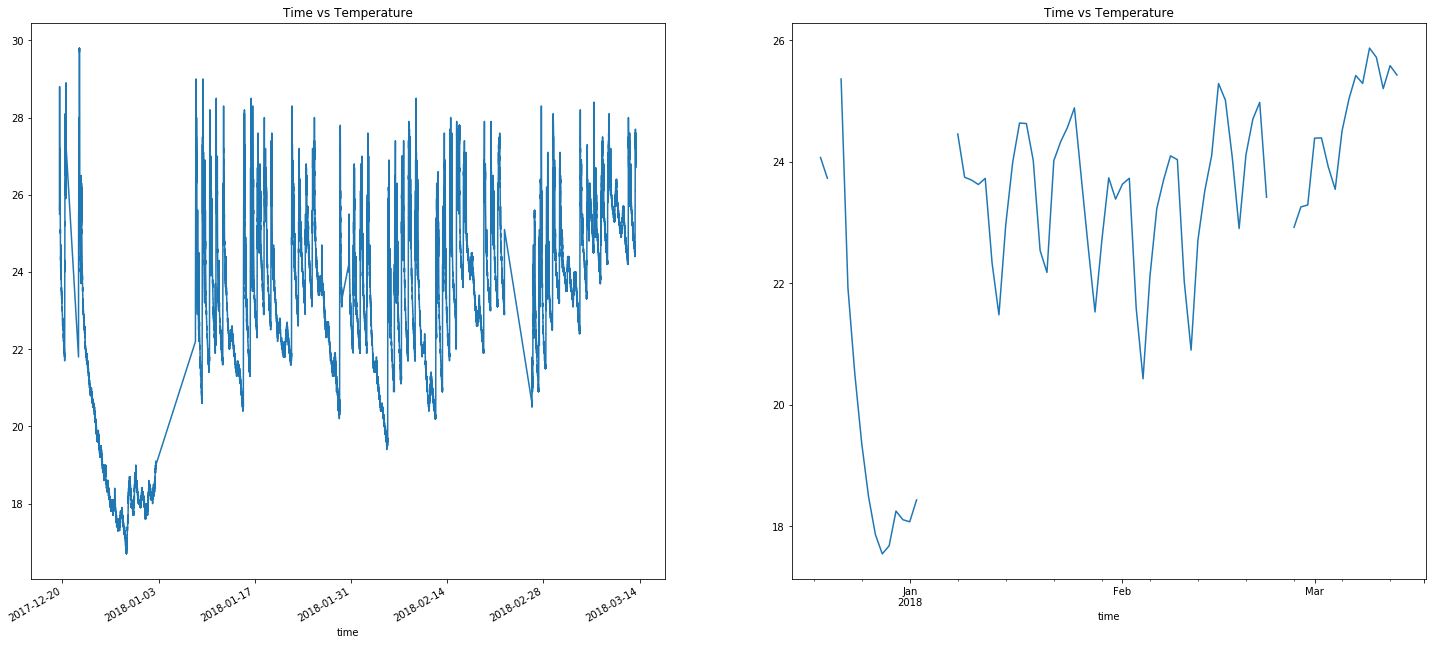

In [32]:
%matplotlib inline
plt.figure(figsize=(25, 25))
plt.subplot(2,2,1)
new_df['T-DHT22'].plot()
plt.title('Time vs Temperature')

plt.subplot(2,2,2)
new_df['T-DHT22'].resample('D').mean().plot()
plt.title('Time vs Temperature')

Text(0.5,1,'Time vs Humidity')

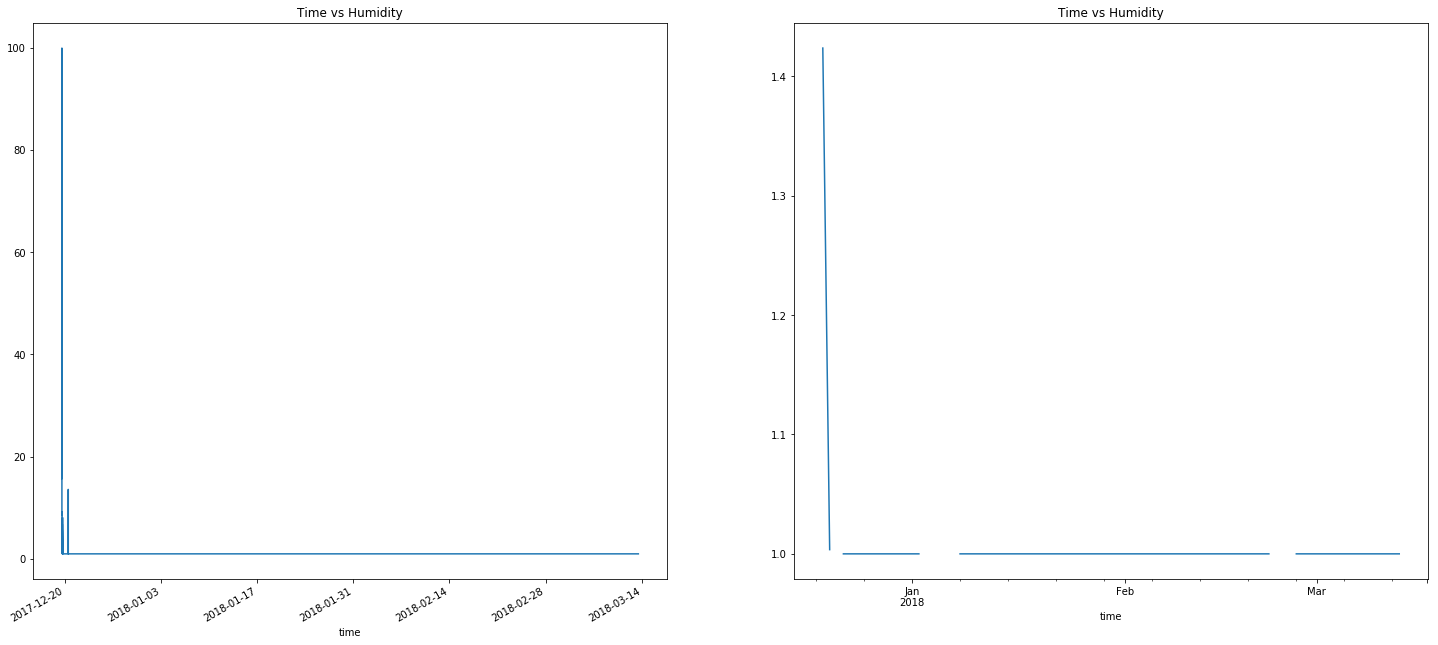

In [33]:
%matplotlib inline
plt.figure(figsize=(25, 25))
plt.subplot(2,2,1)
new_df['H-DHT22'].plot()
plt.title('Time vs Humidity')

plt.subplot(2,2,2)
new_df['H-DHT22'].resample('D').mean().plot()
plt.title('Time vs Humidity')

#### We can see that there are some days when there is no measurement at all 